# Electric Vehicle Population Data Analysis
In this section, we will analyze the **Electric Vehicle Population Data.xlsx** dataset.

## About the Dataset
This dataset includes fundamental information about electric vehicles such as VIN, location, model year, and manufacturer.

### Analysis Steps
1. Data loading and initial overview
2. Data cleaning (handling missing or inconsistent values)
3. Basic statistical analysis (e.g., `describe()`, `value_counts()`)
4. Visualization (matplotlib, seaborn)
5. Concluding the analysis


## 1. Data Loading and Initial Overview


In [1]:
import pandas as pd

# Read the Excel file into a DataFrame
df = pd.read_excel("Electric_Vehicle_Population_Data.xlsx")


In [2]:
# Display the first 5 rows to get a quick look at the data
display(df.head())

VIN (1-10)     County          City State  Postal Code  Model Year  \
0  1C4JJXP66P     Kitsap       Poulsbo    WA      98370.0        2023   
1  1G1FX6S08K  Snohomish  Lake Stevens    WA      98258.0        2019   
2  WBY1Z2C58F       King       Seattle    WA      98116.0        2015   
3  5YJ3E1EBXK       King       Seattle    WA      98178.0        2019   
4  5YJSA1V24F     Yakima         Selah    WA      98942.0        2015   

        Make     Model                   Electric Vehicle Type  \
0       JEEP  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
1  CHEVROLET   BOLT EV          Battery Electric Vehicle (BEV)   
2        BMW        I3          Battery Electric Vehicle (BEV)   
3      TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
4      TESLA   MODEL S          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range            21.0   
1           Clean Alternative Fuel Vehicle Eligible           238.0   
2           Clean Alternative Fuel Vehicle Eligible            81.0   
3           Clean Alternative Fuel Vehicle Eligible           220.0   
4           Clean Alternative Fuel Vehicle Eligible           208.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  23.0       258127145   
1        0.0                  44.0         4735426   
2        0.0                  34.0       272697666   
3        0.0                  37.0       477309682   
4        0.0                  15.0       258112970   

              Vehicle Location                              Electric Utility  \
0  POINT (-122.64681 47.73689)                        PUGET SOUND ENERGY INC   
1  POINT (-122.06402 48.01497)                        PUGET SOUND ENERGY INC   
2  POINT (-122.41067 47.57894)  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)   
3  POINT (-122.23825 47.49461)  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)   
4  POINT (-120.53145 46.65405)                                    PACIFICORP   

   2020 Census Tract  
0       5.303509e+10  
1       5.306105e+10  
2       5.303301e+10  
3       5.303301e+10  
4       5.307700e+10

| **Column Name**                                       | **Description**                                                                                                                                                                                     |
|-------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **VIN (1-10)**                                        | The first 10 characters of the vehicle's unique VIN (Vehicle Identification Number). Normally, a VIN has 17 characters, but only the first 10 are stored in this dataset.                           |
| **County**                                            | The name of the county where the vehicle is registered (e.g., “Snohomish,” “King,” etc.).                                                                                                           |
| **City**                                              | The city where the vehicle is registered.                                                                                                                                                           |
| **State**                                             | The code for the state or region. Here, “WA” denotes Washington State.                                                                                                                              |
| **Postal Code**                                       | The postal code of the vehicle’s registration location.                                                                                                                                             |
| **Model Year**                                        | The vehicle’s model year (production/announcement year).                                                                                                                                           |
| **Make**                                              | The vehicle’s manufacturer or brand (e.g., “CHEVROLET,” “TESLA,” “BMW”).                                                                                                                            |
| **Model**                                             | The vehicle’s model name (e.g., “BOLT EV,” “MODEL 3,” “I3”).                                                                                                                                        |
| **Electric Vehicle Type**                             | Indicates the type of electric vehicle (e.g., “Battery Electric Vehicle (BEV),” “Plug-in Hybrid Electric Vehicle (PHEV)”).                                                                           |
| **Clean Alternative Fuel Vehicle (CAFV) Eligibility** | Indicates whether the vehicle qualifies for certain incentives or advantages (e.g., tax credits, HOV lane access) under the “Clean Alternative Fuel Vehicle” status.                                |
| **Electric Range**                                    | The estimated range (in miles or kilometers) the vehicle can drive using only battery power. In this dataset, it appears to be in miles.                                                           |
| **Base MSRP**                                         | The manufacturer’s suggested retail price (MSRP). In the example data, “0” is shown, so actual data may be missing or hidden.                                                                       |
| **Legislative District**                              | The local or state assembly district number where the vehicle is registered (e.g., Washington State districts: 1, 2, 3, etc.).                                                                      |
| **DOL Vehicle ID**                                    | A unique vehicle registration ID assigned by the Department of Licensing (DOL) in Washington State.                                                                                                 |
| **Vehicle Location**                                  | Shows the vehicle’s geographic location in a POINT format with latitude and longitude (e.g., `POINT (-122.23825 47.49461)`).                                                                        |
| **Electric Utility**                                  | The electric utility or utilities serving the area where the vehicle is located (e.g., “PUGET SOUND ENERGY INC,” “CITY OF SEATTLE - (WA)”).                                                         |
| **2020 Census Tract**                                 | A geographic “tract” code defined for the 2020 U.S. Census, representing a specific region or neighborhood.                                                                                        |


In [3]:
# Show the structure and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223995 entries, 0 to 223994
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         223995 non-null  object 
 1   County                                             223992 non-null  object 
 2   City                                               223992 non-null  object 
 3   State                                              223995 non-null  object 
 4   Postal Code                                        223992 non-null  float64
 5   Model Year                                         223995 non-null  int64  
 6   Make                                               223995 non-null  object 
 7   Model                                              223995 non-null  object 
 8   Electric Vehicle Type                              223995 non-null  object

In [4]:
df["Model Year"].describe()

count    223995.000000
mean       2021.264408
std           2.989676
min        1999.000000
25%        2020.000000
50%        2022.000000
75%        2023.000000
max        2025.000000
Name: Model Year, dtype: float64

In [5]:
df["Electric Range"].describe()

count    223977.000000
mean         47.736187
std          84.987140
min           0.000000
25%           0.000000
50%           0.000000
75%          39.000000
max         337.000000
Name: Electric Range, dtype: float64

## 2. Data Cleaning (Handling Missing or Inconsistent Values)


In [6]:
# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        18
Base MSRP                                             18
Legislative District                                 474
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtyp

In [7]:
# 1. Calculate group-based means (aligned with the original DataFrame index)
group_means = df.groupby(['Make', 'Model'])['Electric Range'].transform('mean')

# 2. Fill missing values in Electric Range with these group-based means
df['Electric Range'] = df['Electric Range'].fillna(group_means)


In [8]:
# Calculate the mean Base MSRP for each (Make, Model) group
base_msrp_means = df.groupby(['Make', 'Model',"Model Year"])['Base MSRP'].transform('mean')

# Fill missing Base MSRP values with the corresponding group mean
df['Base MSRP'] = df['Base MSRP'].fillna(base_msrp_means)


In [9]:
# Fill missing values with 'Unknown' in categorical columns
import warnings
warnings.filterwarnings("ignore")
df['County'].fillna('Unknown', inplace=True)
df['City'].fillna('Unknown', inplace=True)
df['Postal Code'].fillna('Unknown', inplace=True)
df['Electric Utility'].fillna('Unknown', inplace=True)
df['Base MSRP'].fillna(0, inplace=True)

In [10]:
# Drop the specified columns from the DataFrame
df.drop(columns=['Postal Code', 'Vehicle Location', '2020 Census Tract', 'DOL Vehicle ID',"Legislative District"], inplace=True)

# Display the remaining columns to confirm
print("Updated DataFrame columns:")
print(df.columns)


Updated DataFrame columns:
Index(['VIN (1-10)', 'County', 'City', 'State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Electric Utility'],
      dtype='object')


## 3.Basic Statistical Analysi

In [11]:
# Summary statistics for numerical columns
numeric_summary = df.describe()

# Display the summary statistics
print("Numerical Summary Statistics:\n")
print(numeric_summary)


Numerical Summary Statistics:

          Model Year  Electric Range      Base MSRP
count  223995.000000   223995.000000  223995.000000
mean     2021.264408       47.733805     829.827697
std         2.989676       84.984141    7372.216572
min      1999.000000        0.000000       0.000000
25%      2020.000000        0.000000       0.000000
50%      2022.000000        0.000000       0.000000
75%      2023.000000       39.000000       0.000000
max      2025.000000      337.000000  845000.000000


In [12]:
# Count empty string values in Base MSRP
empty_msrp_count = df['Base MSRP'].empty

# Count NaN values in Base MSRP
missing_msrp_count = df['Base MSRP'].isna().sum()

# Count rows where Base MSRP is 0
zero_msrp_count = (df['Base MSRP'] == 0).sum()

# Count rows where Base MSRP is not 0
Notzero_msrp_count = (df['Base MSRP'] != 0).sum()

# Display results
print(f"Number of empty ('') Base MSRP values: {empty_msrp_count}")
print(f"Number of missing (NaN) Base MSRP values: {missing_msrp_count}")
print(f"Number of rows where Base MSRP is 0: {zero_msrp_count}")
print(f"Number of rows where Base MSRP is not  0: {Notzero_msrp_count}")


Number of empty ('') Base MSRP values: False
Number of missing (NaN) Base MSRP values: 0
Number of rows where Base MSRP is 0: 220735
Number of rows where Base MSRP is not  0: 3260


In [13]:
df[df["Base MSRP"] != 0].head(10)

VIN (1-10)     County      City State  Model Year   Make    Model  \
6    WBAJB1C58K   Thurston     Lacey    WA        2019    BMW     530E   
16   5YJSA1H18E     Kitsap   Poulsbo    WA        2014  TESLA  MODEL S   
24   WBA8E1C59J     Kitsap   Poulsbo    WA        2018    BMW     330E   
51   5YJSA1DP8D  Snohomish  Stanwood    WA        2013  TESLA  MODEL S   
88   KNDJP3AE2G   Thurston   Olympia    WA        2016    KIA     SOUL   
126  5YJSA1CN6C   Thurston  Tumwater    WA        2012  TESLA  MODEL S   
132  KNDJX3AE7G     Yakima    Yakima    WA        2016    KIA     SOUL   
135  KNDJX3AE5G   Thurston   Olympia    WA        2016    KIA     SOUL   
174  5YJSA1AG1D      Grant   Othello    WA        2013  TESLA  MODEL S   
183  5YJSA1DP9D   Thurston      Yelm    WA        2013  TESLA  MODEL S   

                      Electric Vehicle Type  \
6    Plug-in Hybrid Electric Vehicle (PHEV)   
16           Battery Electric Vehicle (BEV)   
24   Plug-in Hybrid Electric Vehicle (PHEV)   
51           Battery Electric Vehicle (BEV)   
88           Battery Electric Vehicle (BEV)   
126          Battery Electric Vehicle (BEV)   
132          Battery Electric Vehicle (BEV)   
135          Battery Electric Vehicle (BEV)   
174          Battery Electric Vehicle (BEV)   
183          Battery Electric Vehicle (BEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
6               Not eligible due to low battery range            15.0   
16            Clean Alternative Fuel Vehicle Eligible           208.0   
24              Not eligible due to low battery range            14.0   
51            Clean Alternative Fuel Vehicle Eligible           208.0   
88            Clean Alternative Fuel Vehicle Eligible            93.0   
126           Clean Alternative Fuel Vehicle Eligible           265.0   
132           Clean Alternative Fuel Vehicle Eligible            93.0   
135           Clean Alternative Fuel Vehicle Eligible            93.0   
174           Clean Alternative Fuel Vehicle Eligible           208.0   
183           Clean Alternative Fuel Vehicle Eligible           208.0   

     Base MSRP          Electric Utility  
6      55700.0    PUGET SOUND ENERGY INC  
16     69900.0    PUGET SOUND ENERGY INC  
24     45600.0    PUGET SOUND ENERGY INC  
51     69900.0    PUGET SOUND ENERGY INC  
88     31950.0    PUGET SOUND ENERGY INC  
126    59900.0    PUGET SOUND ENERGY INC  
132    31950.0                PACIFICORP  
135    31950.0    PUGET SOUND ENERGY INC  
174    69900.0  PUD NO 2 OF GRANT COUNTY  
183    69900.0    PUGET SOUND ENERGY INC

In [14]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Electric Utility                                     0
dtype: int64

In [15]:
# Count the number of occurrences for each unique value in categorical columns
print("\nValue Counts for Make:\n", df["Make"].value_counts())



Value Counts for Make:
 Make
TESLA                     96180
CHEVROLET                 16405
NISSAN                    15259
FORD                      11930
KIA                       10760
BMW                        9171
TOYOTA                     8956
HYUNDAI                    6878
RIVIAN                     6236
JEEP                       5773
VOLKSWAGEN                 5740
VOLVO                      5565
AUDI                       4157
CHRYSLER                   3733
MERCEDES-BENZ              2239
SUBARU                     1830
HONDA                      1802
PORSCHE                    1377
POLESTAR                   1222
MINI                       1085
MITSUBISHI                 1065
CADILLAC                   1027
MAZDA                       915
LEXUS                       862
FIAT                        758
DODGE                       733
LUCID                       357
LINCOLN                     336
GENESIS                     319
GMC                         302
SMART     

In [16]:
print("\nValue Counts for Model:\n", df["Model"].value_counts())


Value Counts for Model:
 Model
MODEL Y           46583
MODEL 3           34462
LEAF              13735
MODEL S            7765
BOLT EV            7008
                  ...  
PROMASTER 3500        2
MIRAI                 1
918                   1
FLYING SPUR           1
SIERRA EV             1
Name: count, Length: 164, dtype: int64


In [17]:
print("\nValue Counts for Electric Vehicle Type:\n", df["Electric Vehicle Type"].value_counts())


Value Counts for Electric Vehicle Type:
 Electric Vehicle Type
Battery Electric Vehicle (BEV)            177151
Plug-in Hybrid Electric Vehicle (PHEV)     46844
Name: count, dtype: int64


In [18]:
print("\nValue Counts for Clean Alternative Fuel Vehicle (CAFV) Eligibility:\n", df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts())



Value Counts for Clean Alternative Fuel Vehicle (CAFV) Eligibility:
 Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    130442
Clean Alternative Fuel Vehicle Eligible                          71438
Not eligible due to low battery range                            22115
Name: count, dtype: int64


In [19]:
print("\nValue Counts for County:\n", df["County"].value_counts())


Value Counts for County:
 County
King          113169
Snohomish      27186
Pierce         18026
Clark          13452
Thurston        8252
               ...  
Tom Green          1
Wasco              1
Hays               1
Hennepin           1
James City         1
Name: count, Length: 208, dtype: int64


In [20]:
print("\nValue Counts for City:\n", df["City"].value_counts())


Value Counts for City:
 City
Seattle       35664
Bellevue      10966
Vancouver      8103
Redmond        7772
Bothell        7298
              ...  
Folsom            1
Lakeside          1
Providence        1
Atherton          1
Kailua            1
Name: count, Length: 790, dtype: int64


## Visualization (Matplotlib, Seaborn)

In [21]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Electric Utility'],
      dtype='object')

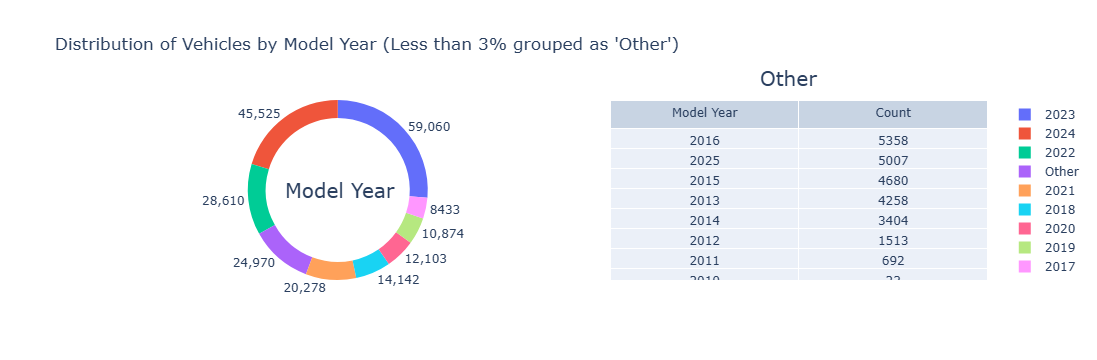

In [107]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# "County" sütunundaki her bir eyaletteki elektrikli araç sayısını hesapla
state_counts = df["Model Year"].value_counts()

# Yüzdelik dilimleri hesapla
state_percentages = state_counts / state_counts.sum() * 100

# %3'den düşük olanları "Other" olarak grupla
threshold = 3
other_counts = state_counts[state_percentages < threshold].sum()
filtered_state_counts = state_counts[state_percentages >= threshold]
filtered_state_counts["Other"] = other_counts

# "Other" olarak gruplandırılan verileri ayrı bir tabloya koy
other_data = state_counts[state_percentages < threshold]

# Alt grafikleri oluştur
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'table'}]])

# Ana grafik
fig.add_trace(
    go.Pie(
        labels=filtered_state_counts.index,
        values=filtered_state_counts,
        hole=.8,
        hoverinfo='label+percent',
        textinfo='value'
    ),
    row=1, col=1
)

# "Other" tablosu
fig.add_trace(
    go.Table(
        header=dict(values=["Model Year", "Count"]),
        cells=dict(values=[other_data.index, other_data.values])
    ),
    row=1, col=2
)

# Başlıklar ekle
fig.update_layout(
    title_text="Distribution of Vehicles by Model Year (Less than 3% grouped as 'Other')",
    annotations=[
        dict(text='Model Year', x=0.16, y=0.5, font_size=20, showarrow=False),
        dict(text='Other', x=0.8, y=1.2, font_size=20, showarrow=False)
    ]
)

# Grafiği göster
fig.show()


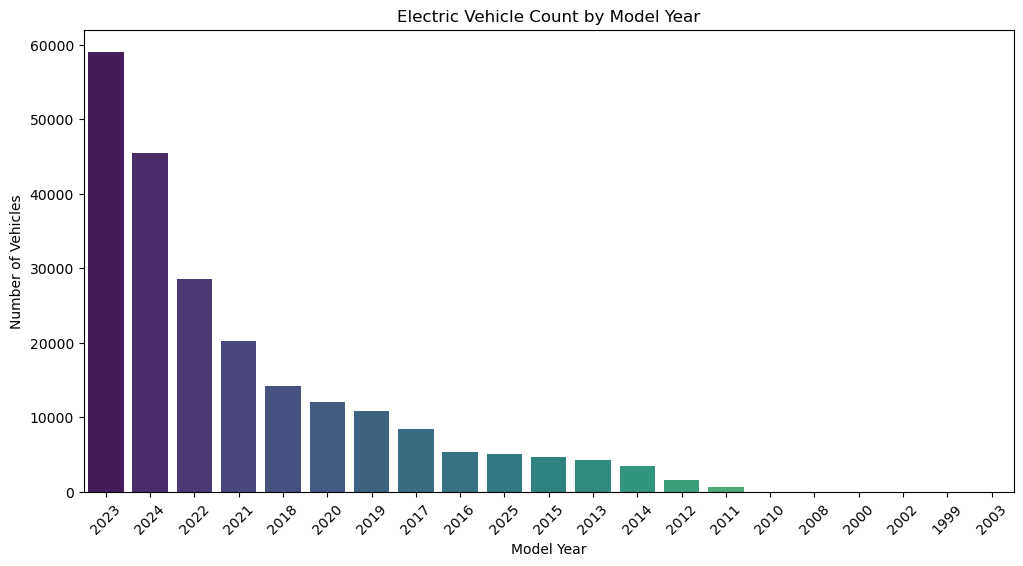

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count number of vehicles per model year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Model Year", palette="viridis", order=df["Model Year"].value_counts().index)

plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles")
plt.title("Electric Vehicle Count by Model Year")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()


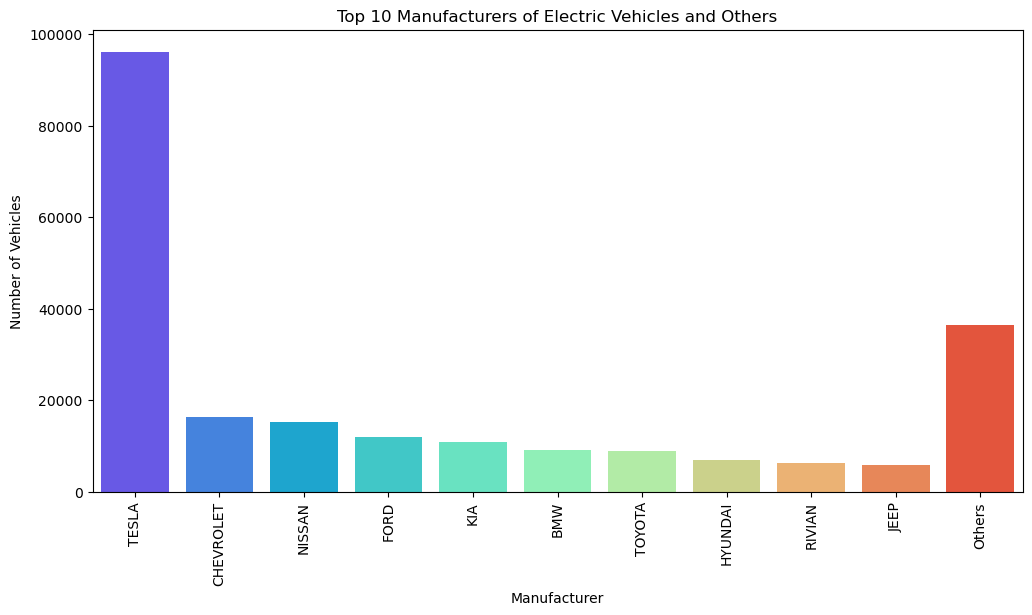

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of all manufacturers
make_counts = df["Make"].value_counts()

# Separate the top 0 and others
top_10 = make_counts.head(10)
others_count = make_counts[10:].sum()

# Combine by adding the 'Others' category
others_series = pd.Series(others_count, index=["Others"])
combined = pd.concat([top_10, others_series])  # using concat instead of append

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=combined.index, y=combined.values, palette="rainbow")

plt.xlabel("Manufacturer")
plt.ylabel("Number of Vehicles")
plt.title("Top 10 Manufacturers of Electric Vehicles and Others")
plt.xticks(rotation=90)
plt.show()


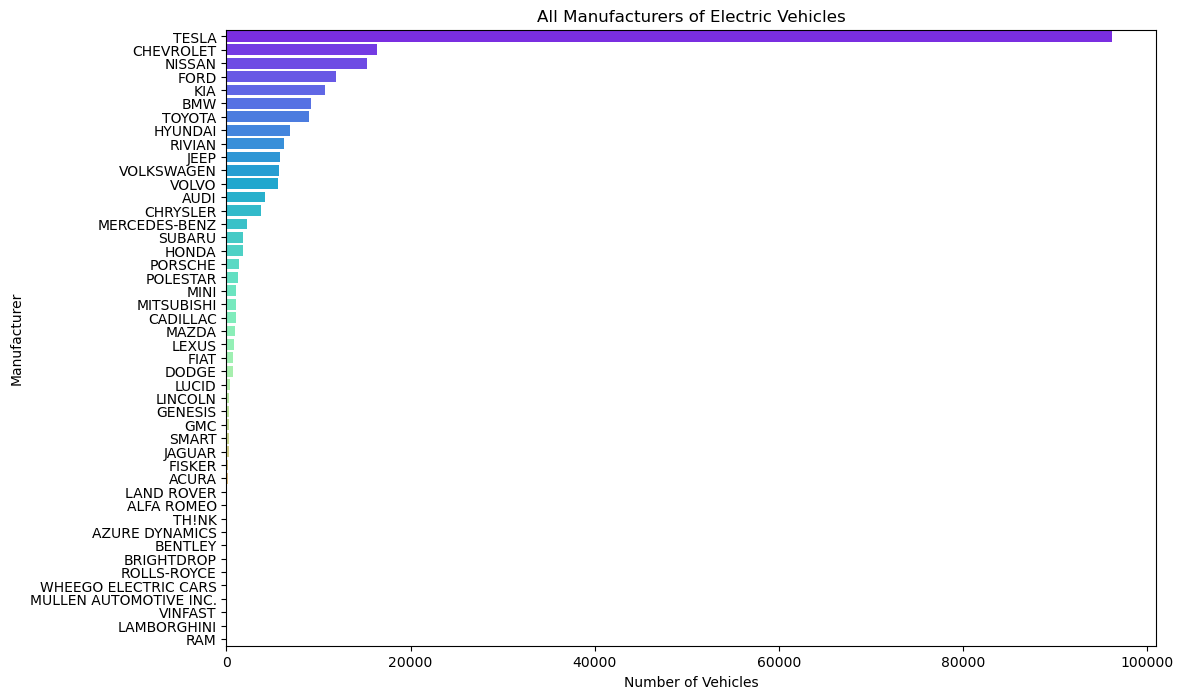

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of all manufacturers
make_counts = df["Make"].value_counts()

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=make_counts.values, y=make_counts.index, palette="rainbow", orient='h')

plt.xlabel("Number of Vehicles")
plt.ylabel("Manufacturer")
plt.title("All Manufacturers of Electric Vehicles")
plt.show()


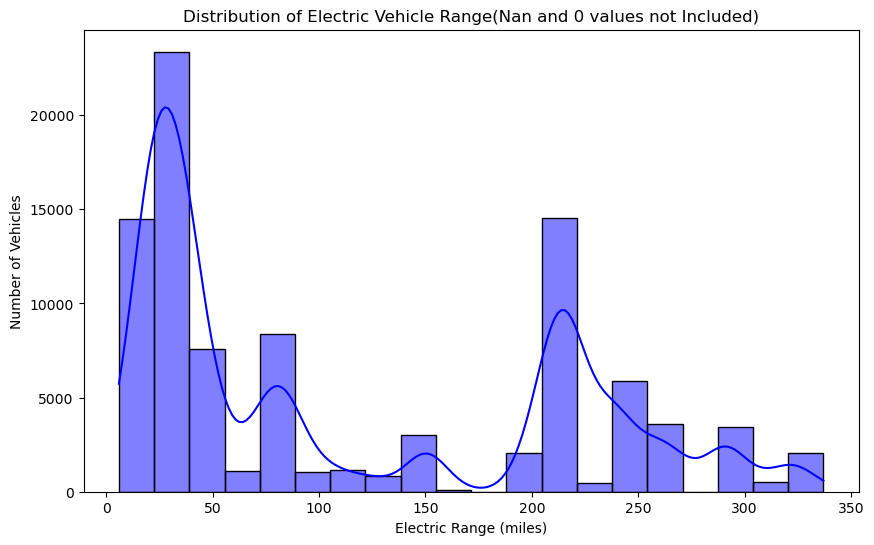

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out NaN values and electric range of 0
filtered_df = df[df["Electric Range"].notna() & (df["Electric Range"] > 0)]

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df["Electric Range"], bins=20, kde=True, color="blue")

plt.xlabel("Electric Range (miles)")
plt.ylabel("Number of Vehicles")
plt.title("Distribution of Electric Vehicle Range(Nan and 0 values not Included)")
plt.show()


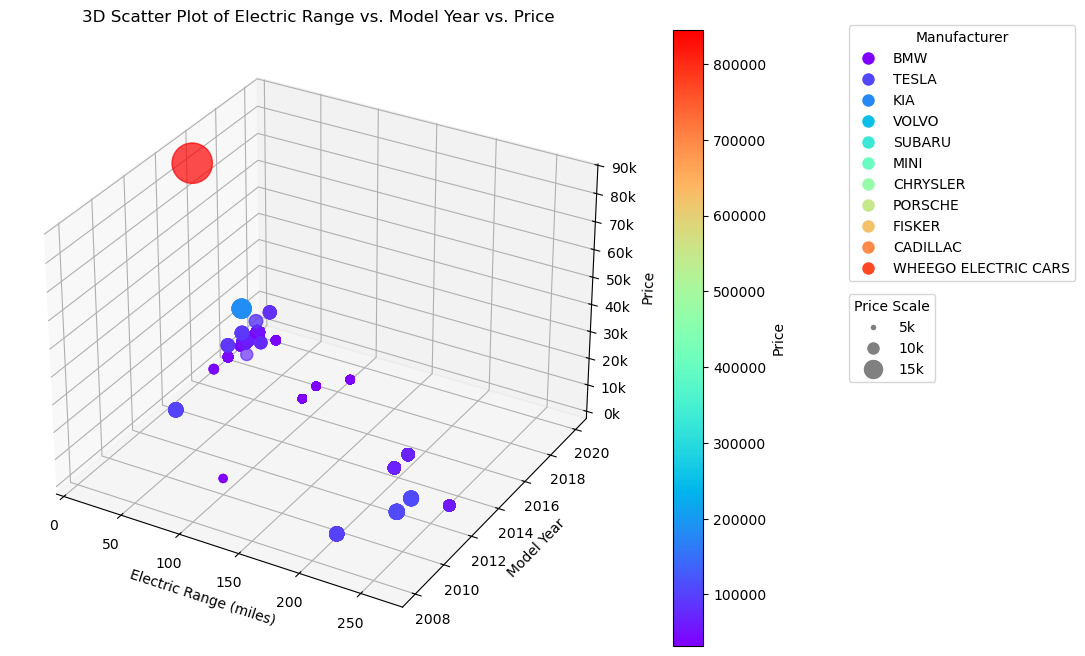

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker

# Filter out NaN values and electric range of 0
filtered_df = df[df["Electric Range"].notna() & (df["Electric Range"] > 0) & (df["Base MSRP"] > 0)]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(filtered_df["Electric Range"], filtered_df["Model Year"], filtered_df["Base MSRP"], c=filtered_df["Base MSRP"], cmap='rainbow', s=filtered_df["Base MSRP"]/1000)

# Adding labels
ax.set_xlabel("Electric Range (miles)")
ax.set_ylabel("Model Year")
ax.set_zlabel("Price")
ax.set_title("3D Scatter Plot of Electric Range vs. Model Year vs. Price")

# Formatting z-axis labels to display in thousands
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fk' % (x * 1e-4)

formatter = ticker.FuncFormatter(thousands)
ax.zaxis.set_major_formatter(formatter)

# Adding color bar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Price')

# Create custom legend for manufacturers
manufacturers = filtered_df["Make"].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.rainbow(i/len(manufacturers)), markersize=10, label=manufacturer) for i, manufacturer in enumerate(manufacturers)]

# Create custom legend for size (Base MSRP) with formatted labels
size_legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=size, label=f'{size}k') for size in [5, 10, 15]]

# Add legends with adjusted positions
first_legend = plt.legend(handles=legend_handles, title="Manufacturer", bbox_to_anchor=(1.35, 0.8), loc='center left')
ax.add_artist(first_legend)
plt.legend(handles=size_legend_handles, title="Price Scale", bbox_to_anchor=(1.35, 0.5), loc='center left')

plt.show()


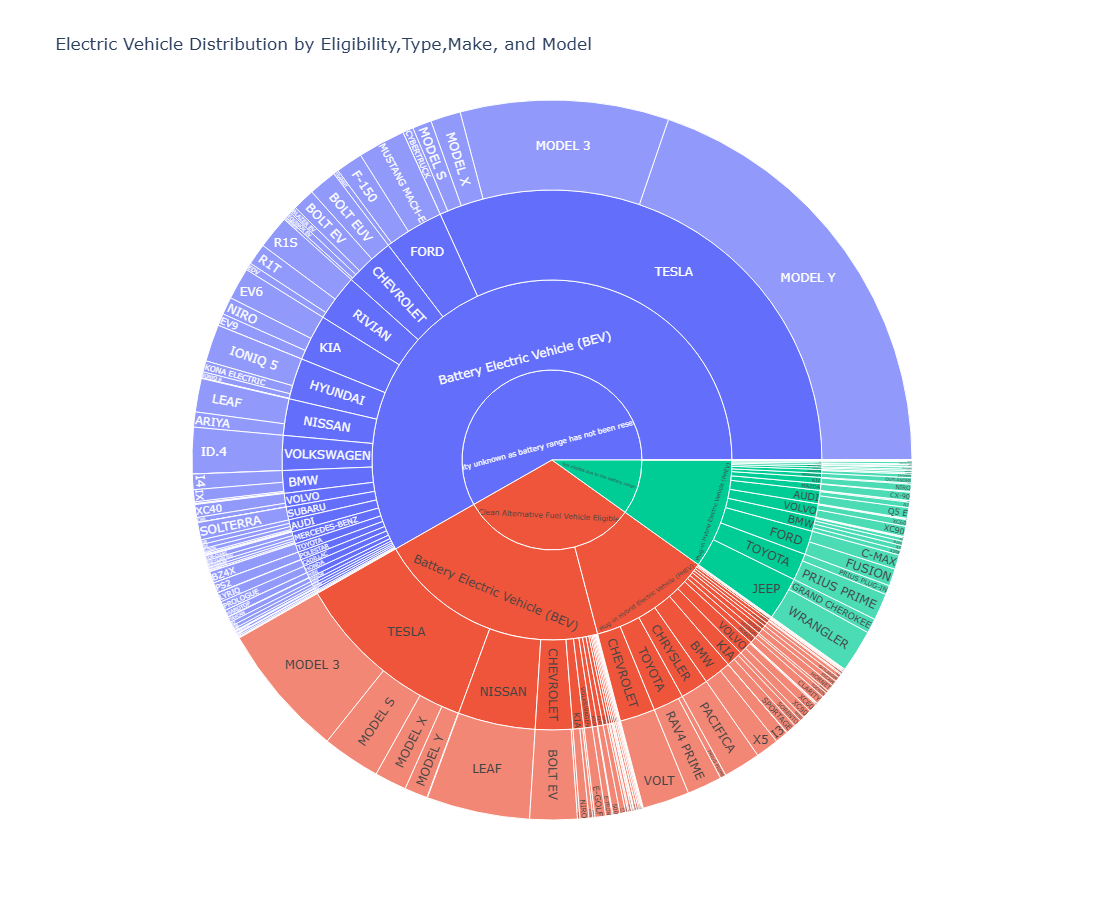

In [29]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = "Electric_Vehicle_Population_Data.xlsx"  # Update with your file path
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Clean column names by stripping any leading or trailing spaces
df.columns = df.columns.str.strip()

# Group the data to get counts for each category
df_sunburst = df.groupby(["Clean Alternative Fuel Vehicle (CAFV) Eligibility", 
                          "Electric Vehicle Type", 
                          "Make", 
                          "Model"]).size().reset_index(name='Count')

# Generate the Sunburst chart with a larger size
fig = px.sunburst(df_sunburst, 
                  path=[ "Clean Alternative Fuel Vehicle (CAFV) Eligibility","Electric Vehicle Type","Make", "Model"], 
                  values="Count",
                  title="Electric Vehicle Distribution by Eligibility,Type,Make, and Model",
                  width=1200,  # Increased width
                  height=900)  # Increased height

# Show the chart
fig.show()


In [80]:
import pandas as pd
import plotly.graph_objects as go

# Load the electric vehicle dataset
file_path = "Electric_Vehicle_Population_Data.xlsx"  # Update this with your actual file path
df_ev = pd.read_excel(file_path, sheet_name="Sheet1")

# Load the U.S. Cities Database (Ensure you download it manually)
us_cities_path = "us_cities.csv"  # Update this with your actual file path
df_cities = pd.read_csv(us_cities_path)



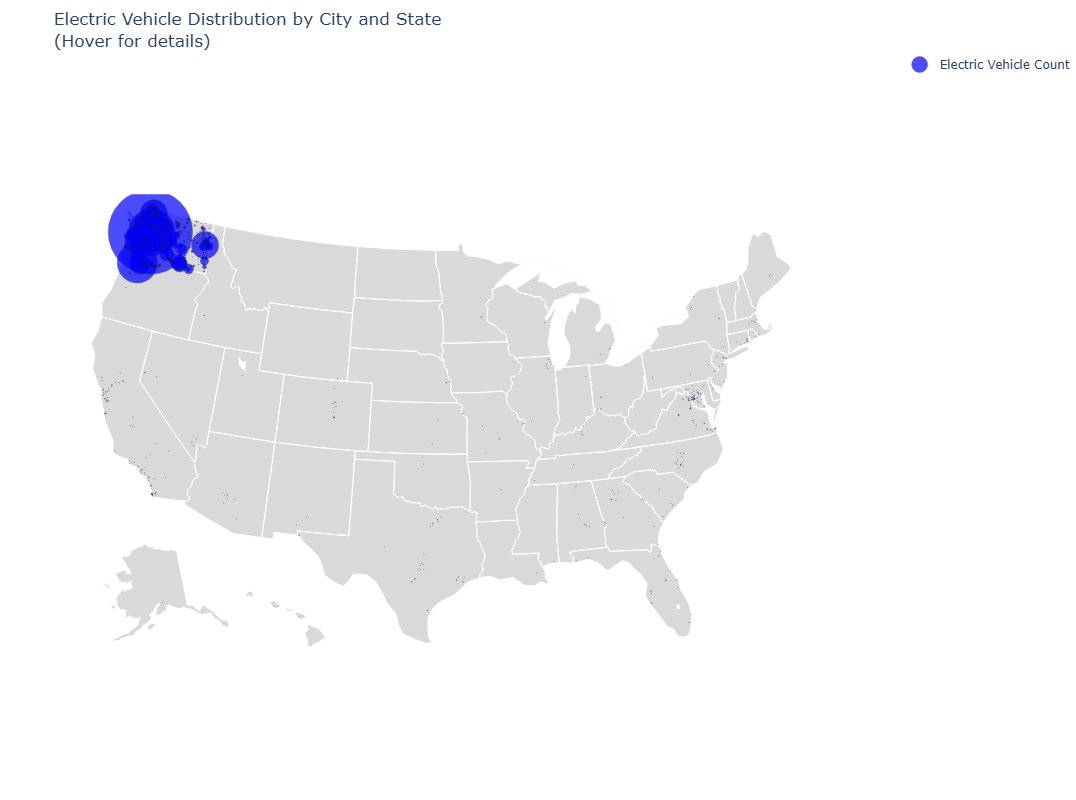

In [84]:
# Rename columns in the U.S. Cities dataset to match expected names
df_cities.rename(columns={
    'CITY': 'city',
    'STATE_CODE': 'state_id',
    'LATITUDE': 'lat',
    'LONGITUDE': 'lng'
}, inplace=True)

# Select only necessary columns
df_cities = df_cities[['city', 'state_id', 'lat', 'lng']]

# Standardize column names in the EV dataset
df_ev.rename(columns={'City': 'city', 'State': 'state_id'}, inplace=True)

# Merge the two datasets to get latitude and longitude
df_merged = pd.merge(df_ev, df_cities, on=['city', 'state_id'], how='left')

# Remove rows where latitude/longitude could not be found
df_merged.dropna(subset=['lat', 'lng'], inplace=True)

# Aggregate data to count electric vehicles per location
df_agg = df_merged.groupby(['County', 'city', 'state_id', 'lat', 'lng']).size().reset_index(name='EV_Count')

# Create hover text
df_agg['text'] = df_agg['city'] + ', ' + df_agg['state_id'] + '<br>EV Count: ' + df_agg['EV_Count'].astype(str)

# Define marker size scale
scale = 0.1  # Adjust this for better visualization

# Create the interactive map
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=df_agg['lng'],
    lat=df_agg['lat'],
    text=df_agg['text'],
    marker=dict(
        size=df_agg['EV_Count'] * scale,
        color='blue',
        line_color='rgb(40,40,40)',
        line_width=0.5,
        sizemode='area'
    ),
    name='Electric Vehicle Count'
))

# Update layout settings
fig.update_layout(
    title_text='Electric Vehicle Distribution by City and State<br>(Hover for details)',
    showlegend=True,
    geo=dict(
        scope='usa',
        landcolor='rgb(217, 217, 217)',
    ),
    width=1200, 
    height=800,
    margin=dict(l=0, r=0, t=50, b=0) 
)

# Show the interactive map
fig.show()

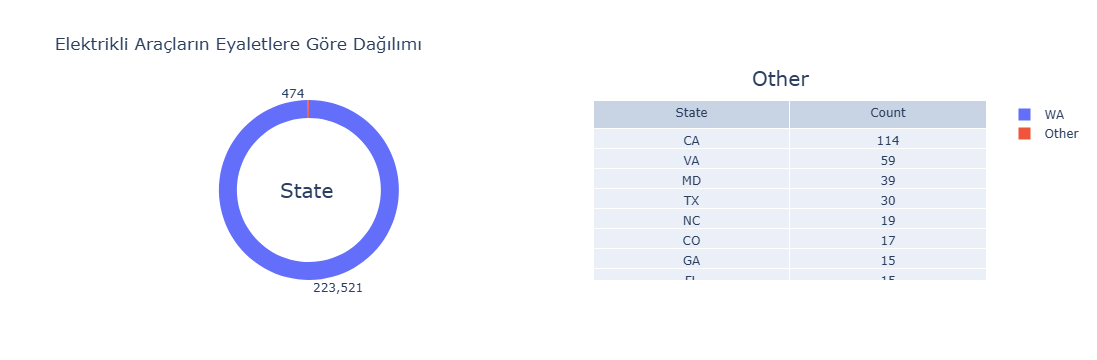

In [78]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# "County" sütunundaki her bir eyaletteki elektrikli araç sayısını hesapla
state_counts = df["State"].value_counts()

# Yüzdelik dilimleri hesapla
state_percentages = state_counts / state_counts.sum() * 100

# %1'den düşük olanları "Other" olarak grupla
threshold = 1
other_counts = state_counts[state_percentages < threshold].sum()
filtered_state_counts = state_counts[state_percentages >= threshold]
filtered_state_counts["Other"] = other_counts

# "Other" olarak gruplandırılan verileri ayrı bir tabloya koy
other_data = state_counts[state_percentages < threshold]

# Alt grafikleri oluştur
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'table'}]])

# Ana grafik
fig.add_trace(
    go.Pie(
        labels=filtered_state_counts.index,
        values=filtered_state_counts,
        hole=.8,
        hoverinfo='label+percent',
        textinfo='value'
    ),
    row=1, col=1
)

# "Other" tablosu
fig.add_trace(
    go.Table(
        header=dict(values=["State", "Count"]),
        cells=dict(values=[other_data.index, other_data.values])
    ),
    row=1, col=2
)

# Başlıklar ekle
fig.update_layout(
    title_text="Elektrikli Araçların Eyaletlere Göre Dağılımı",
    annotations=[
        dict(text='State', x=0.19, y=0.5, font_size=20, showarrow=False),
        dict(text='Other', x=0.8, y=1.2, font_size=20, showarrow=False)
    ]
)

# Grafiği göster
fig.show()


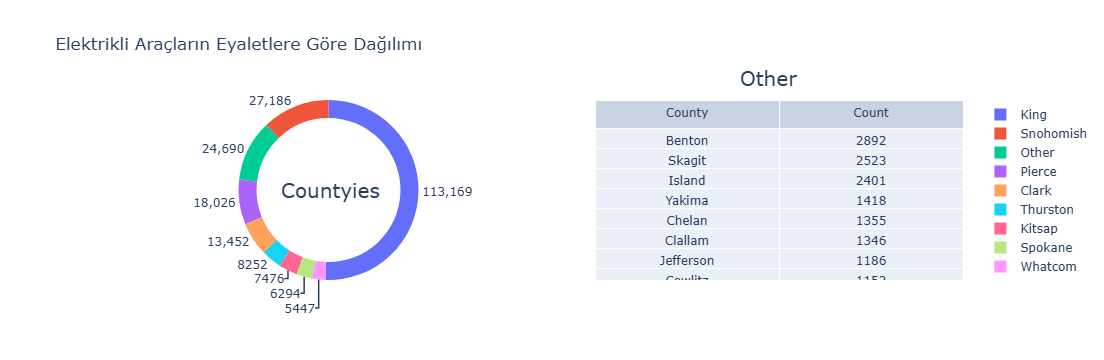

In [59]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# "County" sütunundaki her bir eyaletteki elektrikli araç sayısını hesapla
state_counts = df["County"].value_counts()

# Yüzdelik dilimleri hesapla
state_percentages = state_counts / state_counts.sum() * 100

# %2'den düşük olanları "Other" olarak grupla
threshold = 2
other_counts = state_counts[state_percentages < threshold].sum()
filtered_state_counts = state_counts[state_percentages >= threshold]
filtered_state_counts["Other"] = other_counts

# "Other" olarak gruplandırılan verileri ayrı bir tabloya koy
other_data = state_counts[state_percentages < threshold]

# Alt grafikleri oluştur
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'table'}]])

# Ana grafik
fig.add_trace(
    go.Pie(
        labels=filtered_state_counts.index,
        values=filtered_state_counts,
        hole=.8,
        hoverinfo='label+percent',
        textinfo='value'
    ),
    row=1, col=1
)

# "Other" tablosu
fig.add_trace(
    go.Table(
        header=dict(values=["County", "Count"]),
        cells=dict(values=[other_data.index, other_data.values])
    ),
    row=1, col=2
)

# Başlıklar ekle
fig.update_layout(
    title_text="Elektrikli Araçların Eyaletlere Göre Dağılımı",
    annotations=[
        dict(text='Countyies', x=0.165, y=0.5, font_size=20, showarrow=False),
        dict(text='Other', x=0.8, y=1.2, font_size=20, showarrow=False)
    ]
)

# Grafiği göster
fig.show()


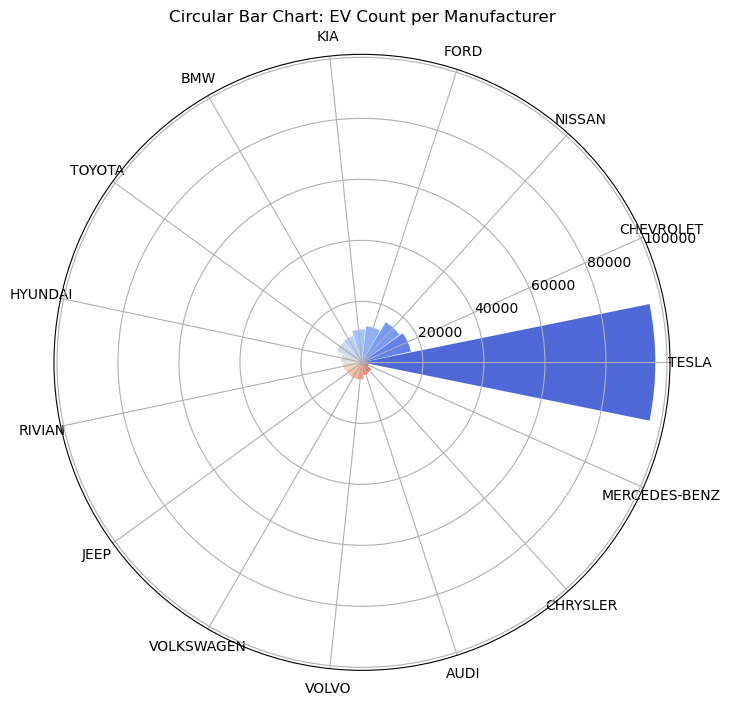

In [90]:
import numpy as np

# Count number of vehicles per manufacturer
make_counts = df["Make"].value_counts().head(15)
angles = np.linspace(0, 2 * np.pi, len(make_counts), endpoint=False).tolist()

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.bar(angles, make_counts, width=0.4, color=sns.color_palette("coolwarm", len(make_counts)))
ax.set_xticks(angles)
ax.set_xticklabels(make_counts.index, rotation=45)

plt.title("Circular Bar Chart: EV Count per Manufacturer")
plt.show()


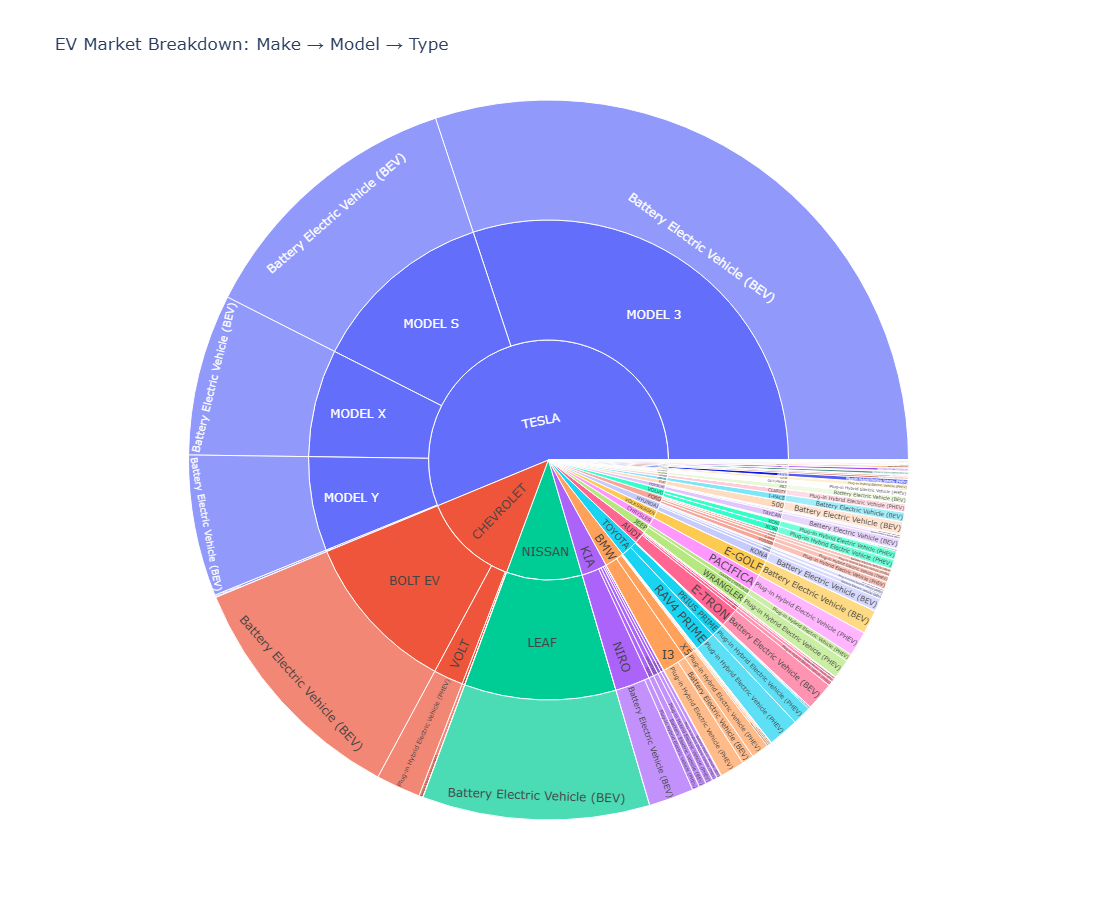

In [111]:
import plotly.express as px

fig = px.sunburst(df, path=["Make", "Model", "Electric Vehicle Type"], 
                  title="EV Market Breakdown: Make → Model → Type",
                  values="Electric Range",
                  width=1200,
                  height=900)
fig.show()


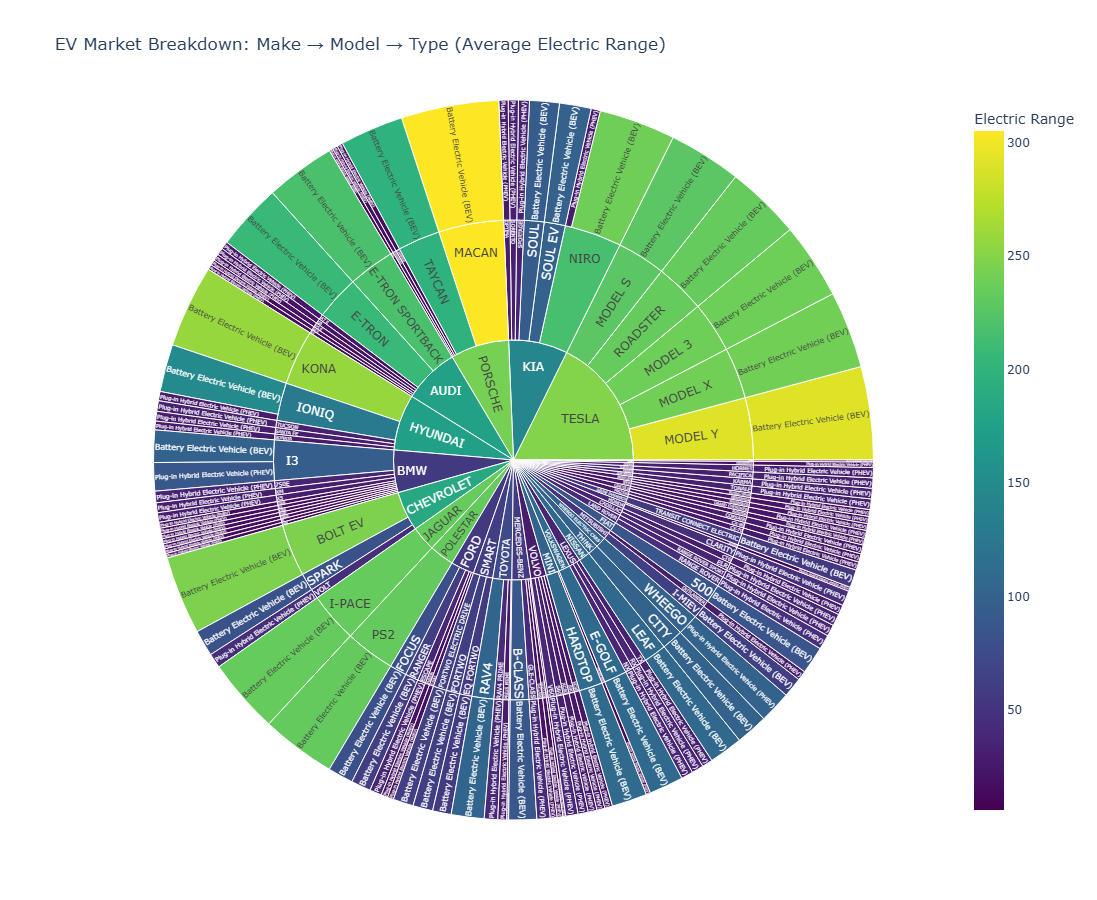

In [112]:
# Re-load necessary libraries and dataset since execution state was reset
import pandas as pd
import plotly.express as px

# Filter out rows where Electric Range is NaN or 0
filtered_df = df[(df["Electric Range"].notna()) & (df["Electric Range"] > 0)]

# Aggregate Electric Range as mean for each Make, Model, and Type
df_sunburst = filtered_df.groupby(["Make", "Model", "Electric Vehicle Type"], as_index=False)["Electric Range"].mean()

# Create the sunburst chart
fig = px.sunburst(df_sunburst, path=["Make", "Model", "Electric Vehicle Type"], 
                  title="EV Market Breakdown: Make → Model → Type (Average Electric Range)",
                  values="Electric Range", color="Electric Range", color_continuous_scale="viridis",
                  width=1200,
                  height=900)

# Show the interactive plot
fig.show()


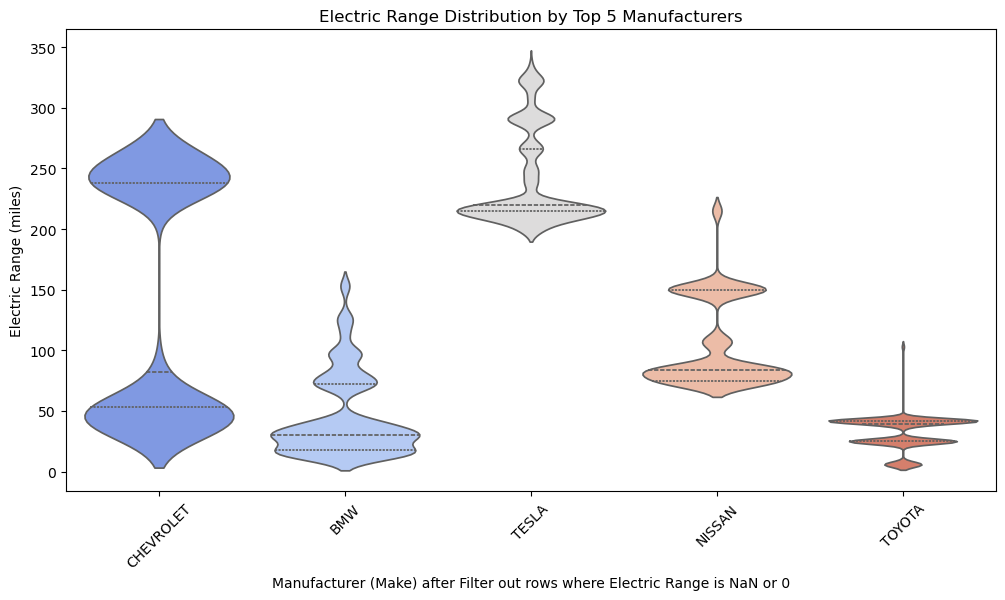

In [114]:
# Reload necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter out rows where Electric Range is NaN or 0
filtered_df = df[(df["Electric Range"].notna()) & (df["Electric Range"] > 0)]

# Get the top 5 makes with the most vehicles
top_5_makes = filtered_df["Make"].value_counts().head(5).index

# Filter the dataset to include only the top 5 makes
df_top_makes = filtered_df[filtered_df["Make"].isin(top_5_makes)]

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_makes, x="Make", y="Electric Range", palette="coolwarm", inner="quartile")
plt.xticks(rotation=45)
plt.title("Electric Range Distribution by Top 5 Manufacturers")
plt.xlabel("Manufacturer (Make) after Filter out rows where Electric Range is NaN or 0")
plt.ylabel("Electric Range (miles)")
plt.show()


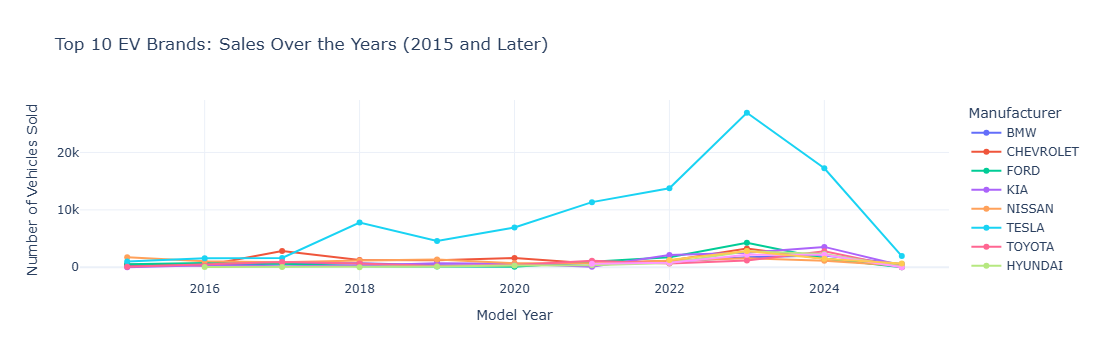

In [117]:
# Reload necessary libraries
import pandas as pd
import plotly.express as px


# Filter data for model years 2015 and later
df_filtered = df[df["Model Year"] >= 2015]

# Count the number of vehicles sold per make over the years
make_year_counts = df_filtered.groupby(["Model Year", "Make"]).size().reset_index(name="Count")

# Get the top 10 brands with the most vehicles
top_makes = df_filtered["Make"].value_counts().head(10).index
top_make_year_counts = make_year_counts[make_year_counts["Make"].isin(top_makes)]

# Create an interactive line chart for years 2015 and later
fig = px.line(top_make_year_counts, x="Model Year", y="Count", color="Make",
              markers=True, title="Top 10 EV Brands: Sales Over the Years (2015 and Later)",
              labels={"Model Year": "Model Year", "Count": "Number of Vehicles Sold", "Make": "Manufacturer"},
              template="plotly_white")

# Show the interactive plot
fig.show()


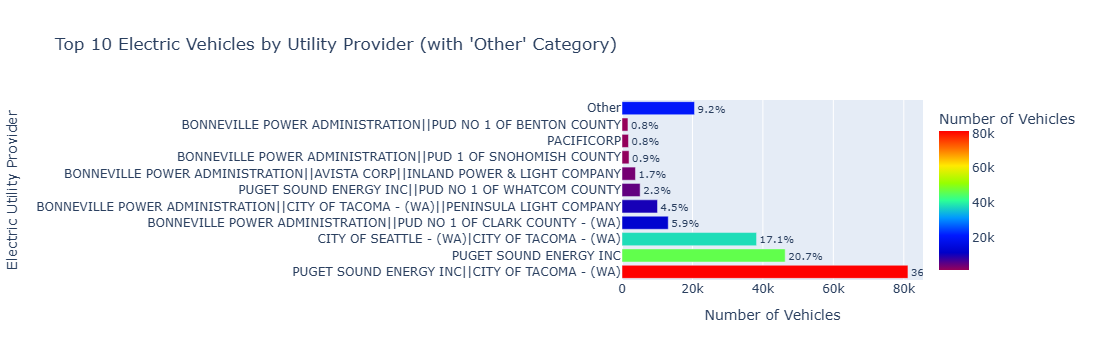

In [125]:
# Reload necessary libraries
import pandas as pd
import plotly.express as px

# Calculate the number of vehicles per Electric Utility
utility_counts = df["Electric Utility"].value_counts()

# Separate top 10 and "Other" category
top_10_utilities = utility_counts.head(10)
other_sum = utility_counts.iloc[10:].sum()

# Create a new DataFrame with the "Other" category
utility_summary = top_10_utilities.reset_index()
utility_summary.columns = ["Electric Utility Provider", "Number of Vehicles"]

# Append "Other" category
other_df = pd.DataFrame([["Other", other_sum]], columns=["Electric Utility Provider", "Number of Vehicles"])
utility_summary = pd.concat([utility_summary, other_df], ignore_index=True)

# Calculate percentage share
utility_summary["Percentage"] = (utility_summary["Number of Vehicles"] / utility_summary["Number of Vehicles"].sum()) * 100

# Create an interactive bar chart
fig = px.bar(utility_summary, x="Number of Vehicles", y="Electric Utility Provider",
             text=utility_summary["Percentage"].apply(lambda x: f"{x:.1f}%"),  # Show percentage labels
             orientation='h', title="Top 10 Electric Vehicles by Utility Provider (with 'Other' Category)",
             labels={"Number of Vehicles": "Number of Vehicles", "Electric Utility Provider": "Electric Utility"},
             color="Number of Vehicles", color_continuous_scale="rainbow")

# Improve layout
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title="Number of Vehicles", yaxis_title="Electric Utility Provider")

# Show interactive chart
fig.show()


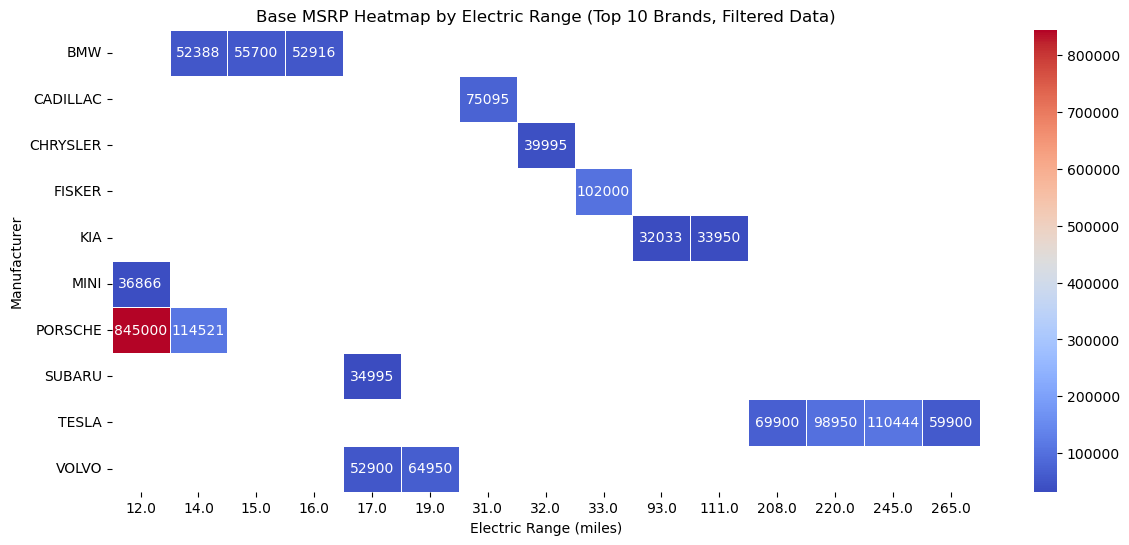

In [129]:
# Reload necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# ---- Heatmap ----
# Pivot table for heatmap
df_pivot = df_filtered.pivot_table(index="Make", columns="Electric Range", values="Base MSRP", aggfunc=np.mean)

plt.figure(figsize=(14, 6))
sns.heatmap(df_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.xlabel("Electric Range (miles)")
plt.ylabel("Manufacturer")
plt.title("Base MSRP Heatmap by Electric Range (Top 10 Brands, Filtered Data)")
plt.show()


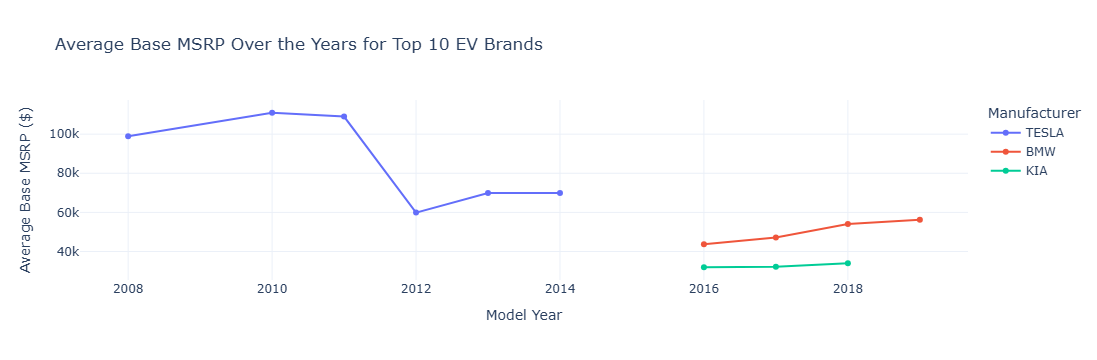

In [134]:
# Reload necessary libraries
import pandas as pd
import plotly.express as px


# Get top 10 brands based on the entire dataset 
top_10_makes = df["Make"].value_counts().head(10).index

# Now apply filtering for only  later while keeping only top brands
filtered_df = df[(df["Make"].isin(top_10_makes)) & 
                 (df["Base MSRP"].notna()) & 
                 (df["Base MSRP"] > 0)]


# Filter dataset for only top 10 brands
df_top_makes = filtered_df[filtered_df["Make"].isin(top_10_makes)]

# Group by Model Year and Make to calculate the average Base MSRP
df_avg_price = df_top_makes.groupby(["Model Year", "Make"], as_index=False)["Base MSRP"].mean()

# Create an interactive line chart
fig = px.line(df_avg_price, x="Model Year", y="Base MSRP", color="Make",
              title="Average Base MSRP Over the Years for Top 10 EV Brands",
              labels={"Model Year": "Model Year", "Base MSRP": "Average Base MSRP ($)", "Make": "Manufacturer"},
              markers=True, template="plotly_white")

# Show the interactive plot
fig.show()


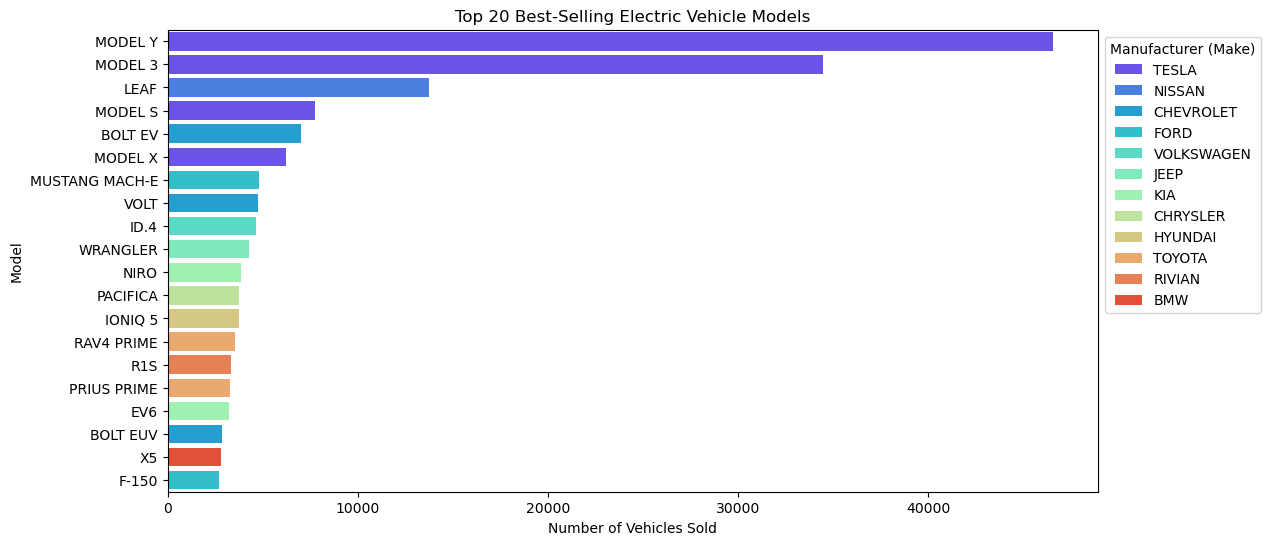

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of vehicles sold per (Make, Model) combination
model_counts = df.groupby(["Make", "Model"]).size().reset_index(name="Count")

# Get the top-selling Make-Model combinations
top_models = model_counts.sort_values(by="Count", ascending=False).head(20)

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_models, x="Count", y="Model", hue="Make", dodge=False, palette="rainbow")

plt.xlabel("Number of Vehicles Sold")
plt.ylabel("Model")
plt.title("Top 20 Best-Selling Electric Vehicle Models")
plt.legend(title="Manufacturer (Make)", bbox_to_anchor=(1, 1))
plt.show()


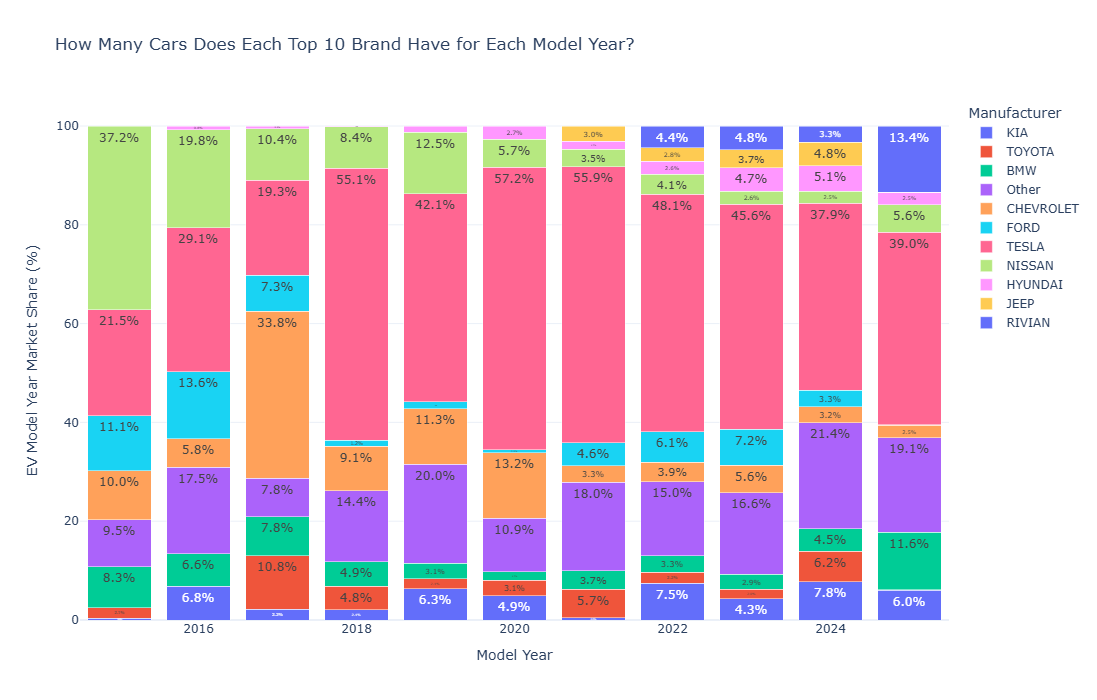

In [146]:
# Reload necessary libraries
import pandas as pd
import plotly.express as px


# Filter for model year 2015 and later
df_filtered = df[df["Model Year"] >= 2015]

# Count the number of vehicles sold per (Model Year, Make)
yearly_make_counts = df_filtered.groupby(["Model Year", "Make"]).size().reset_index(name="Count")

# Get the top 10 brands by total vehicle count
top_10_brands = df_filtered["Make"].value_counts().head(10).index

# Separate top brands and group all others as "Other"
yearly_make_counts["Make"] = yearly_make_counts["Make"].apply(lambda x: x if x in top_10_brands else "Other")

# Recalculate the counts including "Other"
yearly_make_counts = yearly_make_counts.groupby(["Model Year", "Make"])["Count"].sum().reset_index()

# Calculate the total vehicles sold per year
yearly_totals = yearly_make_counts.groupby("Model Year")["Count"].sum().reset_index()
yearly_totals.rename(columns={"Count": "Total"}, inplace=True)

# Merge total sales with individual make sales
yearly_make_counts = yearly_make_counts.merge(yearly_totals, on="Model Year")

# Calculate the percentage for each make per year
yearly_make_counts["Percentage"] = (yearly_make_counts["Count"] / yearly_make_counts["Total"]) * 100

# Sort by lowest to highest percentage per year for correct stacking order
yearly_make_counts = yearly_make_counts.sort_values(by=["Model Year", "Percentage"])

# Create an interactive stacked bar chart
fig = px.bar(yearly_make_counts, x="Model Year", y="Percentage", color="Make",
             title="How Many Cars Does Each Top 10 Brand Have for Each Model Year?",
             labels={"Model Year": "Model Year", "Percentage": "EV Model Year Market Share (%)", "Make": "Manufacturer"},
             text=yearly_make_counts["Percentage"].apply(lambda x: f"{x:.1f}%"),  # Show percentage on hover
             barmode="stack")

# Improve layout (increase y-axis height and format text inside bars)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(yaxis_title="EV Model Year Market Share (%)", xaxis_title="Model Year", legend_title="Manufacturer",
                  template="plotly_white", height=700)  # Increase height for better readability

# Show interactive plot
fig.show()


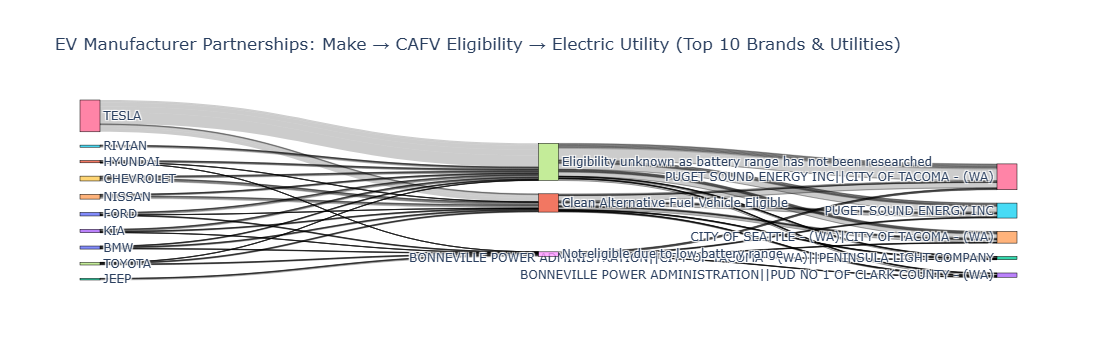

In [149]:
import plotly.graph_objects as go
import pandas as pd


# Get the top 10 brands by total vehicle count
top_10_makes = df["Make"].value_counts().head(10).index

# Get the top 10 Electric Utility providers
top_10_utilities = df["Electric Utility"].value_counts().head(5).index

# Filter dataset for only top 10 brands and top 10 electric utilities
df_filtered = df[(df["Make"].isin(top_10_makes)) & (df["Electric Utility"].isin(top_10_utilities))]

# Prepare data for Sankey diagram
df_sankey = df_filtered.groupby(["Make", "Clean Alternative Fuel Vehicle (CAFV) Eligibility", "Electric Utility"], as_index=False).size()

# Create label mapping for Sankey diagram
all_labels = list(pd.unique(df_sankey[['Make', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility']].values.ravel()))
label_dict = {label: i for i, label in enumerate(all_labels)}

# Create source and target lists for first layer (Make → CAFV Eligibility)
sources = df_sankey["Make"].map(label_dict)
targets = df_sankey["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].map(label_dict)
values = df_sankey["size"]

# Second layer (CAFV Eligibility → Electric Utility)
sources2 = df_sankey["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].map(label_dict)
targets2 = df_sankey["Electric Utility"].map(label_dict)
values2 = df_sankey["size"]

# Combine data for Sankey diagram
sankey_data = {
    "source": sources.tolist() + sources2.tolist(),
    "target": targets.tolist() + targets2.tolist(),
    "value": values.tolist() + values2.tolist()
}

# Create Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
    ),
    link=dict(
        source=sankey_data["source"],
        target=sankey_data["target"],
        value=sankey_data["value"],
    )
))

fig.update_layout(title_text="EV Manufacturer Partnerships: Make → CAFV Eligibility → Electric Utility (Top 10 Brands & Utilities)", font_size=12)
fig.show()


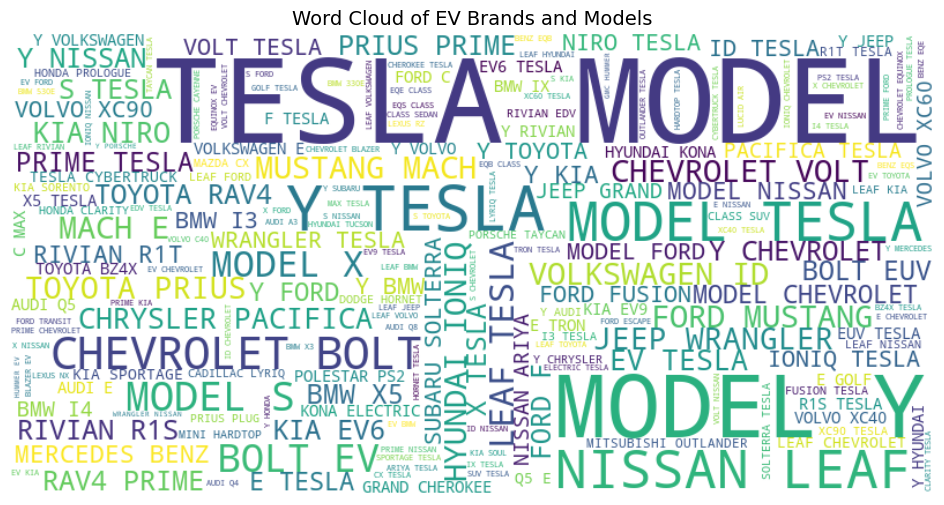

In [166]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Extract 'Make' and 'Model' columns and combine them into a single string
text = " ".join(df["Make"] + " " + df["Model"])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

# Display the generated word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of EV Brands and Models", fontsize=14)
plt.show()
